In [7]:
# # run in first lines for installing
# !pip install yfinance

## Usando o pacote yfinance para capturar dados históricos

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Using yfinance to get Petrobras prices
petro = yf.Ticker("PETR4.SA")

# get historical market data
# hist = petro.history(period = "5y")

# other way is determining a period
hist = petro.history(start="2007-01-01", end="2022-11-03")  


In [6]:
# get stock info: some of the features of yfinance
petro.info

{'zip': '20031-912',
 'sector': 'Energy',
 'fullTimeEmployees': 45532,
 'longBusinessSummary': 'Petróleo Brasileiro S.A. - Petrobras explores for, produces, and sells oil and gas in Brazil and internationally. The company operates through Exploration and Production; Refining, Transportation and Marketing; Gas and Power; and Corporate and Other Businesses segments. It engages in prospecting, drilling, refining, processing, trading, and transporting crude oil from producing onshore and offshore oil fields, and shale or other rocks, as well as oil products, natural gas, and other liquid hydrocarbons. The Exploration and Production segment explores, develops, and produces crude oil, natural gas liquids, and natural gas primarily for supplies to the domestic refineries. The Refining, Transportation and Marketing segment engages in the refining, logistics, transport, marketing, and trading of crude oil and oil products; exportation of ethanol; and extraction and processing of shale, as well 

In [8]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-01-02 00:00:00-02:00,9.881424,9.970357,9.833993,9.944665,10244800,0.225,0.0
2007-01-03 00:00:00-02:00,9.913044,9.960475,9.488142,9.642293,19898600,0.000,0.0
2007-01-04 00:00:00-02:00,9.584984,9.634391,9.367592,9.426881,21060200,0.000,0.0
2007-01-05 00:00:00-02:00,9.328067,9.484194,8.913047,9.140320,24864000,0.000,0.0
2007-01-08 00:00:00-02:00,9.189725,9.316208,9.051385,9.247038,19440200,0.000,0.0
...,...,...,...,...,...,...,...
2022-10-26 00:00:00-03:00,32.599998,33.529999,31.900000,32.709999,121334800,0.000,0.0
2022-10-27 00:00:00-03:00,32.810001,33.540001,32.669998,32.959999,111008800,0.000,0.0
2022-10-28 00:00:00-03:00,32.700001,33.119999,31.860001,32.570000,129745400,0.000,0.0


In [9]:
# creating log returns 
log_prices = np.log(hist["Close"])
log_returns = log_prices.diff().dropna()

# another way without using first differences and log
log_returns2 = hist["Close"].pct_change().dropna() 

In [10]:
log_prices

Date
2007-01-02 00:00:00-02:00    2.297036
2007-01-03 00:00:00-02:00    2.266159
2007-01-04 00:00:00-02:00    2.243565
2007-01-05 00:00:00-02:00    2.212695
2007-01-08 00:00:00-02:00    2.224303
                               ...   
2022-10-26 00:00:00-03:00    3.487681
2022-10-27 00:00:00-03:00    3.495295
2022-10-28 00:00:00-03:00    3.483392
2022-10-31 00:00:00-03:00    3.394844
2022-11-01 00:00:00-03:00    3.396520
Name: Close, Length: 3927, dtype: float64

In [11]:
log_returns

Date
2007-01-03 00:00:00-02:00   -0.030877
2007-01-04 00:00:00-02:00   -0.022594
2007-01-05 00:00:00-02:00   -0.030870
2007-01-08 00:00:00-02:00    0.011608
2007-01-09 00:00:00-02:00   -0.031039
                               ...   
2022-10-26 00:00:00-03:00   -0.024760
2022-10-27 00:00:00-03:00    0.007614
2022-10-28 00:00:00-03:00   -0.011903
2022-10-31 00:00:00-03:00   -0.088548
2022-11-01 00:00:00-03:00    0.001676
Name: Close, Length: 3926, dtype: float64

In [12]:
log_returns2

Date
2007-01-03 00:00:00-02:00   -0.030405
2007-01-04 00:00:00-02:00   -0.022340
2007-01-05 00:00:00-02:00   -0.030398
2007-01-08 00:00:00-02:00    0.011676
2007-01-09 00:00:00-02:00   -0.030562
                               ...   
2022-10-26 00:00:00-03:00   -0.024456
2022-10-27 00:00:00-03:00    0.007643
2022-10-28 00:00:00-03:00   -0.011833
2022-10-31 00:00:00-03:00   -0.084741
2022-11-01 00:00:00-03:00    0.001677
Name: Close, Length: 3926, dtype: float64

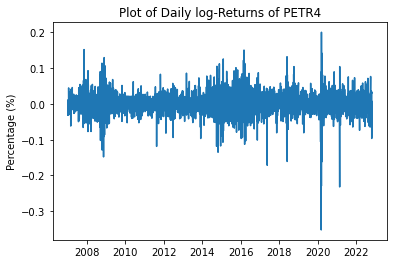

In [13]:
# ploting the log returns
plt.plot(log_returns);
plt.title("Plot of Daily log-Returns of PETR4");
plt.ylabel("Percentage (%)");

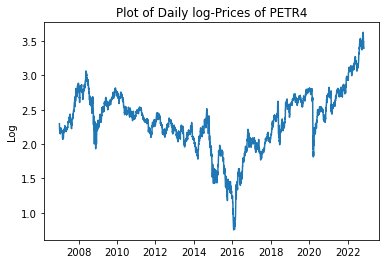

In [14]:
# ploting the prices
plt.plot(log_prices);
plt.title("Plot of Daily log-Prices of PETR4");
plt.ylabel("Log");

## Volatility modeling in Python
Vamos usar o pacote arch para estimar os modelos. Também podemos encontrar algumas postagens em que os modelos GARCH são estimados usando otimização (estilo solver), dado que são modelos determinísticos da volatilidade.
Para mais detalhes do pacote:
https://arch.readthedocs.io/en/latest/univariate/introduction.html


In [15]:
# analyzing the ACF of returns and quadratic returns
# !pip install statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ADF test: unit root
adf = adfuller(log_prices)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
    print('\t{}: {}'.format(key, value))   

ADF Statistic: -1.6311966949754657
p-value: 0.46686437740982195
Critical Values:
	1%: -3.432019708703093
	5%: -2.8622777859108606
	10%: -2.567162732014412


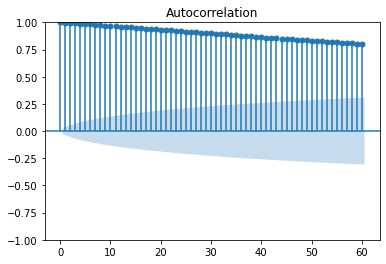

In [16]:
# ACF of log_prices
plot_acf(log_prices, lags=60);     

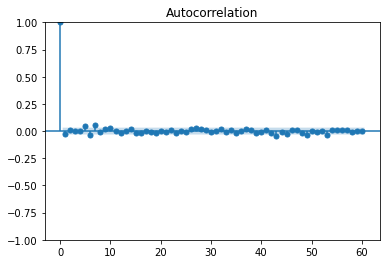

In [17]:
# ACF of log_returns
plot_acf(log_returns, lags=60);     

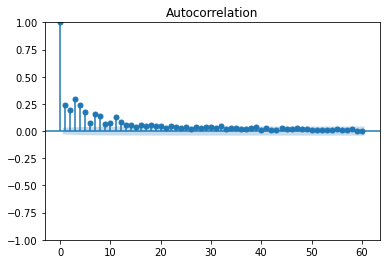

In [18]:
# ACF of quadratic returns: see the conditional homoscedasticity 
plot_acf(log_returns**2, lags=60);     

In [19]:
# run first line for installing the library
!pip install -q arch
from arch import arch_model


In [20]:
# creating a ARCH(12) model with constant mean
garch = arch_model(log_returns, vol='ARCH', p=12, rescale=False).fit(disp='off')
print(garch.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                8796.48
Distribution:                  Normal   AIC:                          -17565.0
Method:            Maximum Likelihood   BIC:                          -17477.1
                                        No. Observations:                 3926
Date:                Fri, Nov 11 2022   Df Residuals:                     3925
Time:                        18:56:57   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.1393e-04  3.916e-04      2.079  3.765e-02 [4.

In [21]:
# creating a GARCH(1,1) model with constant mean
garch = arch_model(log_returns, vol='GARCH', p=1, q=1, rescale=False).fit(disp='off')
print(garch.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8802.94
Distribution:                  Normal   AIC:                          -17597.9
Method:            Maximum Likelihood   BIC:                          -17572.8
                                        No. Observations:                 3926
Date:                Fri, Nov 11 2022   Df Residuals:                     3925
Time:                        18:56:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.6569e-04  4.116e-04      1.617      0.106 

In [22]:
# creating a GARCH(1,1) model with AR(1) mean
garch = arch_model(log_returns,mean='ARX', lags=1, vol='GARCH', p=1, q=1, rescale=False).fit(disp='off')
print(garch.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                  Close   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8801.85
Distribution:                  Normal   AIC:                          -17593.7
Method:            Maximum Likelihood   BIC:                          -17562.3
                                        No. Observations:                 3925
Date:                Fri, Nov 11 2022   Df Residuals:                     3923
Time:                        18:56:57   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      6.8584e-04  4.153e-04      1.651  9.866e-02 

In [23]:
# creating a GARCH(1,1) model zero mean
garch = arch_model(log_returns,mean='Zero', vol='GARCH', p=1, q=1, rescale=False).fit(disp='off')
print(garch.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8801.29
Distribution:                  Normal   AIC:                          -17596.6
Method:            Maximum Likelihood   BIC:                          -17577.8
                                        No. Observations:                 3926
Date:                Fri, Nov 11 2022   Df Residuals:                     3926
Time:                        18:56:57   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7382e-05  6.641e-12  2.617e+06      0.000 [1.

In [24]:
 # creating a GARCH(1,1) model with constant mean and t-Student errors
garch = arch_model(log_returns,
                   vol='GARCH',
                   power=1.0,
                   dist='StudentsT',
                   rescale='False').fit(disp='off')
print(garch.summary())

                       Constant Mean - AVGARCH Model Results                        
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          AVGARCH   Log-Likelihood:                8973.76
Distribution:      Standardized Student's t   AIC:                          -17937.5
Method:                  Maximum Likelihood   BIC:                          -17906.1
                                              No. Observations:                 3926
Date:                      Fri, Nov 11 2022   Df Residuals:                     3925
Time:                              18:56:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [25]:
 # creating a GARCH(1,1) model with constant mean, t-Student errors and asymmetric shocks (GJR-GARCH)
garch = arch_model(log_returns,
                   vol='GARCH',
                   p=1,
                   o=1,
                   q=1,
                   power=1.0,
                   dist='StudentsT',
                   rescale='False').fit(disp='off')
print(garch.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:                5100.75
Distribution:      Standardized Student's t   AIC:                          -10189.5
Method:                  Maximum Likelihood   BIC:                          -10151.8
                                              No. Observations:                 3926
Date:                      Fri, Nov 11 2022   Df Residuals:                     3925
Time:                              18:56:58   Df Model:                            1
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

## Forecasting volatility

https://arch.readthedocs.io/en/latest/univariate/forecasting.html


In [26]:
forecast = garch.forecast(horizon=1)
forecast.variance

C:\Users\caio.cabral\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,h.1
Date,
2007-01-03 00:00:00-02:00,NaN
2007-01-04 00:00:00-02:00,NaN
2007-01-05 00:00:00-02:00,NaN
2007-01-08 00:00:00-02:00,NaN
2007-01-09 00:00:00-02:00,NaN
...,...
2022-10-26 00:00:00-03:00,NaN
2022-10-27 00:00:00-03:00,NaN
2022-10-28 00:00:00-03:00,NaN
